<a href="https://colab.research.google.com/github/KhinMyatNandar/Fraud-Detection/blob/main/SMOTE_ENN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
CCFD= pd.read_csv('/content/new_creditcard.csv')

In [ ]:
df=pd.DataFrame(CCFD)

In [ ]:
X=df.drop('Class', axis=1)
y=df['Class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
SMOTE_ENN = SMOTEENN(random_state=42)
X_train_smoteenn, y_train_smoteenn = SMOTE_ENN.fit_resample(X_train, y_train)

In [ ]:
# Display the new class distribution
print('Original dataset shape:', Counter(y_train))
print('smote_enn dataset shape:', Counter(y_train_smoteenn))

Original dataset shape: Counter({0: 198269, 1: 339})
smote_enn dataset shape: Counter({1: 198269, 0: 198014})


Text(0.5, 1.0, 'Class Distribution after SMOTE_ENN')

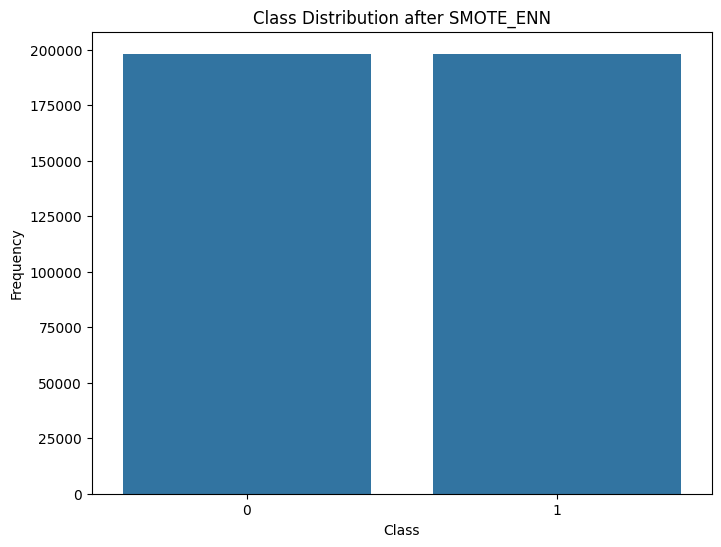

In [ ]:
#plot the class distribution after SMOTE_ENN
smote_enn_distribution = Counter(y_train_smoteenn)
plt.figure(figsize=(8, 6))
sns.barplot(x=list(smote_enn_distribution.keys()), y=list(smote_enn_distribution.values()))
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution after SMOTE_ENN')

In [ ]:
# Defining the models
models={
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}
for i in range(len(list(models))):
  #model= list(models.values())[i]#youtube
    model_name=list(models.keys())[i]
    model=list(models.values())[i]
    #print(f"Training {model}...") #to ensure loop is worked
    model.fit(X_train_smoteenn, y_train_smoteenn)#train model

 #predictions
    y_train_pred_smoteenn= model.predict(X_train_smoteenn)
    y_test_pred_smoteenn= model.predict(X_test)
    y_test_proba_smoteenn= model.predict_proba(X_test)[:,1]#needed for AUC and AUPRC

        #Training set performance
    smoteenn_train_precision= precision_score(y_train_smoteenn, y_train_pred_smoteenn)
    smoteenn_train_recall= recall_score(y_train_smoteenn, y_train_pred_smoteenn)
    smoteenn_train_f1_score= f1_score(y_train_smoteenn, y_train_pred_smoteenn, average='weighted')
    smoteenn_train_roc_auc= roc_auc_score(y_train_smoteenn, y_train_pred_smoteenn)
    smoteenn_train_auprc= average_precision_score(y_train_smoteenn, y_train_pred_smoteenn)
     #Testing set performance
    smoteenn_test_precision= precision_score(y_test, y_test_pred_smoteenn)
    smoteenn_test_recall= recall_score(y_test, y_test_pred_smoteenn)
    smoteenn_test_f1_score= f1_score(y_test, y_test_pred_smoteenn, average='weighted')
    smoteenn_test_roc_auc= roc_auc_score(y_test, y_test_pred_smoteenn)
    smoteenn_test_auprc= average_precision_score(y_test, y_test_pred_smoteenn)

IndentationError: unexpected indent (<ipython-input-9-98feaeeec11b>, line 2)

IndentationError: unexpected indent (<ipython-input-12-8aebe3441adb>, line 2)

In [ ]:
       #print(list(models.keys())[i])
    print(f"Model:{model_name}")
    print('Model performace for Training set with smoteenn')
    print("- Precision : {:.4f}".format(smoteenn_train_precision))
    print("- Recall : {:.4f}".format(smoteenn_train_recall))
    print("- F1 Score : {:.4f}".format(smoteenn_train_f1_score))
    print("- AUC-ROC : {:.4f}".format(smoteenn_train_roc_auc))
    print("- AUPRC : {:.4f}".format(smoteenn_train_auprc))

    print('----------------------------------')

    print('Model performace for Testing set with smoteenn')
    print("- Precision : {:.4f}".format(smoteenn_test_precision))
    print("- Recall : {:.4f}".format(smoteenn_test_recall))
    print("- F1 Score : {:.4f}".format(smoteenn_test_f1_score))
    print("- AUC-ROC : {:.4f}".format(smoteenn_test_roc_auc))
    print("- AUPRC : {:.4f}".format(smoteenn_test_auprc))

    print('='*35)
    print('\n')

In [ ]:
    # Recalculate metrics without retraining
    smoteenn_test_precision = precision_score(y_test, y_test_pred_smoteenn)
    smoteenn_test_recall = recall_score(y_test, y_test_pred_smoteenn)
    smoteenn_test_f1_score = f1_score(y_test, y_test_pred_smoteenn, average='weighted')
    smoteenn_test_roc_auc = roc_auc_score(y_test, y_test_pred_smoteenn)
    smoteenn_test_auprc = average_precision_score(y_test, y_test_pred_smoteenn)

NameError: name 'y_test_pred_smoteenn' is not defined

In [ ]:
    # Save the results
    results = {
        "Model": model_name,
        "Sampling Technique": "SMOTE-ENN",  # Change this as per the notebook
        "Test Precision": smoteenn_test_precision,
        "Test Recall": smoteenn_test_recall,
        "Test F1 Score": smoteenn_test_f1_score,
        "Test AUC-ROC": smoteenn_test_roc_auc,
        "Test AUPRC": smoteenn_test_auprc
    }

In [ ]:
results_df = pd.DataFrame([results])
results_df.to_csv(f'{model_name}_smoteenn_results.csv', index=False)